In [5]:
def normalise_zero_one(image_array):
    """Image normalisation. Normalises image to fit [0, 1] range."""

    image = image_array.astype(np.float32)

    minimum = np.min(image)
    maximum = np.max(image)

    if maximum > minimum:
        ret = (image - minimum) / (maximum - minimum)
    else:
        ret = image * 0.
    return ret



In [24]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology
from scipy import ndimage
import transform_HU_functions as hu

In [25]:
# PATHS
path_image = 'C:\\Users\\crist\\aidlp_project\\Task07_Pancreas\\sample_data\\resized_training\\pancreas_001.nii.gz'
path_label = 'C:\\Users\\crist\\aidlp_project\\Task07_Pancreas\\sample_data\\resized_targets\\pancreas_001.nii.gz'

In [26]:
# LOAD IMAGE
image = nib.load(path_image)
image_array = image.get_fdata()
image_header = image.header
image_array.shape

(512, 512, 95)

In [29]:
array_normalised = normalise_zero_one(image_array)
print('Min and Max pixel intesity values: ', array_normalised.min(), array_normalised.max())
#print(array_normalised)

Min and Max pixel intesity values:  0.0 1.0


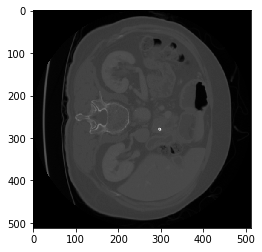

In [10]:
# SHOW ONE SLICE OF IMAGE
array = array_normalised[:,:,40]
plt.imshow(array, cmap='gray')
plt.show()

In [15]:
slope, intercept = hu.get_slope_intercept(image)
image_array = image.get_fdata()
hu_image = hu.convert_to_HU(image_array, slope, intercept)
window_image = hu.window_image_center(hu_image, 40, 400)

Min and Max pixel intesity values:  0.0 1.0


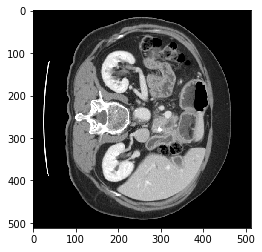

In [30]:
# SHOW ONE SLICE OF IMAGE
array_normalised_2 = normalise_zero_one(window_image)
print('Min and Max pixel intesity values: ', array_normalised_2.min(), array_normalised_2.max())

#print(array_normalised)
array = array_normalised_2[:,:,40]
plt.imshow(array, cmap='gray')
plt.show()